### Bibliotecas

In [109]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic

plt.style.use("ggplot")

### Dados

In [110]:
df_masc = pd.read_csv('data/crossfit_open_elite_masculino_2021.csv', index_col=[0])
df_fem = pd.read_csv('data/crossfit_open_elite_feminino_2021.csv', index_col=[0])

In [111]:
df_masc.head()

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
0,JEFFRE,ADLER,1,Canada,North America,27,CrossFit Wonderland,101.0,20,8,27,46,143.76,175.26,89.55
1,SCOTT,PANCHIK,2,United States,North America,33,CrossFit Mentality,141.0,33,47,5,56,143.31,175.26,85.0
2,TRAVIS,MEAD,3,United States,North America,34,Iron Valley CrossFit,165.0,87,24,48,6,156.46,185.42,93.18
3,SAXON,PANCHIK,4,United States,North America,25,CrossFit Cliffside,217.0,5,68,87,57,143.31,175.26,81.82
4,RICHARD,FRONING JR.,5,United States,North America,33,CrossFit Mayhem,254.0,58,91,5,100,141.50,175.26,88.18


In [112]:
df_fem.head()

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
0,TIA-CLAIR,TOOMEY,1,Australia,Oceania,27,CrossFit East Nashville,26,6,11,1,8.0,104.31,163.0,58.0
1,EMMA,CARY,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,1,14,37.0,98.87,162.56,63.64
2,KARA,SAUNDERS,3,Australia,Oceania,31,CrossFit Carv,111,63,23,20,5.0,105.22,162.0,71.82
3,KRISTI ERAMO,O'CONNELL,4,United States,North America,32,CrossFit Polaris,189,121,21,4,43.0,98.41,157.48,60.0
4,MALLORY,O'BRIEN,5,United States,North America,17,Lion Brave CrossFit,211,4,163,2,42.0,98.41,160.02,65.91


In [113]:
df_fem['continent'] = df_fem['continent'].astype('category')
df_masc['continent'] = df_masc['continent'].astype('category')

## EDA - Categoria Feminino

In [114]:
df_fem.duplicated().sum()

0

In [115]:
df_fem = df_fem.sort_values(by=['placing'])
df_fem.head(8)

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
0,TIA-CLAIR,TOOMEY,1,Australia,Oceania,27,CrossFit East Nashville,26,6,11,1,8.0,104.31,163.0,58.0
1,EMMA,CARY,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,1,14,37.0,98.87,162.56,63.64
2,KARA,SAUNDERS,3,Australia,Oceania,31,CrossFit Carv,111,63,23,20,5.0,105.22,162.0,71.82
3,KRISTI ERAMO,O'CONNELL,4,United States,North America,32,CrossFit Polaris,189,121,21,4,43.0,98.41,157.48,60.0
4,MALLORY,O'BRIEN,5,United States,North America,17,Lion Brave CrossFit,211,4,163,2,42.0,98.41,160.02,65.91
5,EMMA,MCQUAID,6,Ireland,Europe,31,Boundary CrossFit,232,171,9,27,25.0,101.59,165.0,64.0
6,DANI,SPEEGLE,7,United States,North America,27,CrossFit Invictus,238,114,83,37,4.0,107.03,167.64,76.36
7,ELENA,CARRATALA SANAHUJA,8,Spain,Europe,27,CrossFit 4 Friends,241,110,15,62,54.0,97.96,uninformed,uninformed


In [116]:
df_fem['height'] = pd.to_numeric(df_fem['height'], errors='coerce')
df_fem['weight'] = pd.to_numeric(df_fem['weight'], errors='coerce')

In [117]:
df_fem.head(8)

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
0,TIA-CLAIR,TOOMEY,1,Australia,Oceania,27,CrossFit East Nashville,26,6,11,1,8.0,104.31,163.00,58.00
1,EMMA,CARY,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,1,14,37.0,98.87,162.56,63.64
2,KARA,SAUNDERS,3,Australia,Oceania,31,CrossFit Carv,111,63,23,20,5.0,105.22,162.00,71.82
3,KRISTI ERAMO,O'CONNELL,4,United States,North America,32,CrossFit Polaris,189,121,21,4,43.0,98.41,157.48,60.00
4,MALLORY,O'BRIEN,5,United States,North America,17,Lion Brave CrossFit,211,4,163,2,42.0,98.41,160.02,65.91
5,EMMA,MCQUAID,6,Ireland,Europe,31,Boundary CrossFit,232,171,9,27,25.0,101.59,165.00,64.00
6,DANI,SPEEGLE,7,United States,North America,27,CrossFit Invictus,238,114,83,37,4.0,107.03,167.64,76.36
7,ELENA,CARRATALA SANAHUJA,8,Spain,Europe,27,CrossFit 4 Friends,241,110,15,62,54.0,97.96,NaN,NaN


In [118]:
df_fem.describe()

,placing,age,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.0000,185.000000,184.000000
mean,100.450000,28.140000,1292.145000,357.57500,283.260000,204.05000,447.260000,90.7420,160.599568,64.254457
std,57.864141,4.717166,579.958675,324.63757,268.886299,191.89572,369.468302,5.1271,20.085546,6.714343
min,1.000000,16.000000,26.000000,3.00000,1.000000,1.00000,4.000000,80.7300,2.000000,4.000000
25%,50.750000,25.000000,812.000000,107.00000,80.500000,61.00000,153.750000,87.0700,158.000000,61.360000
50%,100.500000,28.000000,1326.500000,244.00000,209.000000,144.00000,336.500000,90.7000,163.000000,64.275000
75%,150.250000,31.000000,1787.250000,543.25000,395.000000,298.00000,620.250000,93.8800,167.640000,68.180000
max,200.000000,43.000000,2201.000000,1452.00000,1416.000000,1011.00000,1826.000000,107.0300,179.000000,81.000000


In [119]:
df_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   first_name     200 non-null    object  
 1   lastname       200 non-null    object  
 2   placing        200 non-null    int64   
 3   country        200 non-null    object  
 4   continent      200 non-null    category
 5   age            200 non-null    int64   
 6   affiliate      200 non-null    object  
 7   points         200 non-null    int64   
 8   21.1           200 non-null    int64   
 9   21.2           200 non-null    int64   
 10  21.3           200 non-null    int64   
 11  21.4           200 non-null    float64 
 12  weight_lifted  200 non-null    float64 
 13  height         185 non-null    float64 
 14  weight         184 non-null    float64 
dtypes: category(1), float64(4), int64(6), object(4)
memory usage: 23.8+ KB


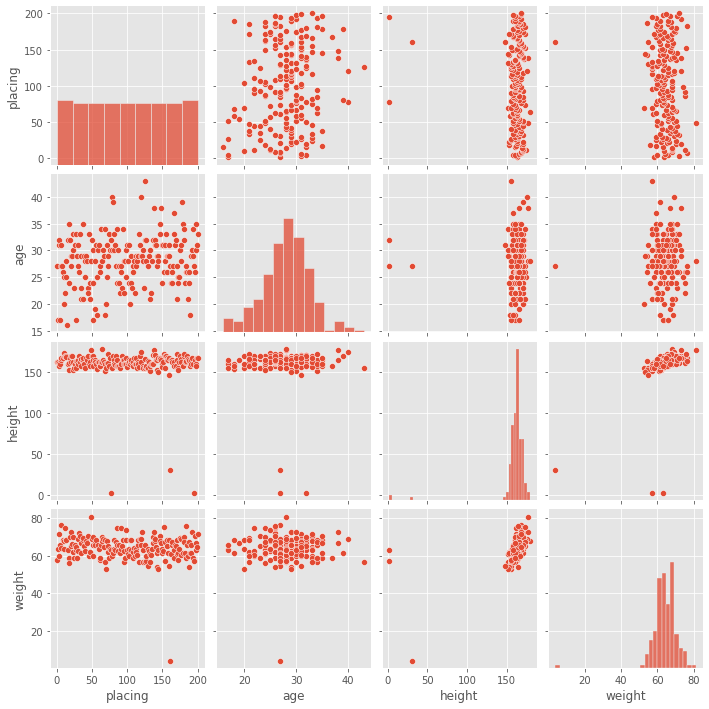

In [120]:
x = df_fem[['placing', 'country', 'age', 'height', 'weight', 'affiliate']]
sns.pairplot(x)

In [121]:
df_fem.query('height < 120')

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
76,BRENDA,CASTRO,77,Mexico,North America,32,CrossFit Tigran,1100,158,590,176,176.0,93.42,2.0,63.18
160,AMANDA,MACKAY,161,New Zealand,Oceania,27,CrossFit Mecca,1860,138,273,718,731.0,86.17,30.0,4.00
194,ANA,MARTINEZ,195,Mexico,North America,27,not_affiliate,2152,107,571,48,1426.0,82.54,2.0,57.00


In [122]:
from numpy import NaN


df_fem.iat[76,13] = NaN
df_fem.iat[160,13] = NaN
df_fem.iat[194,13] = NaN

In [123]:
df_fem.query('height < 120')

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,


In [124]:
df_fem.query('weight < 20')

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
160,AMANDA,MACKAY,161,New Zealand,Oceania,27,CrossFit Mecca,1860,138,273,718,731.0,86.17,NaN,4.0


In [125]:

df_fem.iat[160,14] = NaN

In [126]:
df_fem.query('weight < 20')

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,


<AxesSubplot: xlabel='height', ylabel='points'>

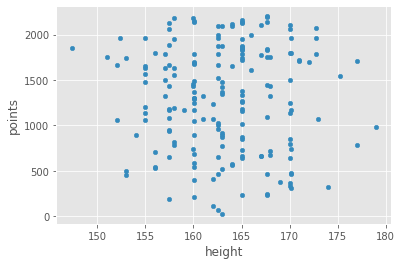

In [127]:
df_fem.plot(kind='scatter', x='height', y='points')


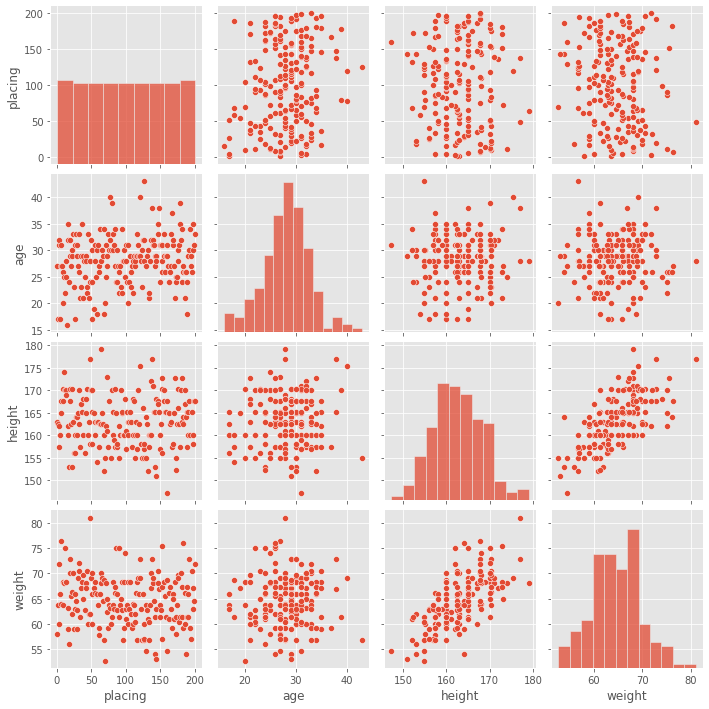

In [128]:
x = df_fem[['placing', 'country', 'age', 'height', 'weight', 'affiliate']]
sns.pairplot(x)

## EDA - Categoria Masculino

In [129]:
df_masc = df_masc.sort_values(by=['placing'])
df_masc.head(8)

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
0,JEFFRE,ADLER,1,Canada,North America,27,CrossFit Wonderland,101.0,20,8,27,46,143.76,175.26,89.55
1,SCOTT,PANCHIK,2,United States,North America,33,CrossFit Mentality,141.0,33,47,5,56,143.31,175.26,85.0
2,TRAVIS,MEAD,3,United States,North America,34,Iron Valley CrossFit,165.0,87,24,48,6,156.46,185.42,93.18
3,SAXON,PANCHIK,4,United States,North America,25,CrossFit Cliffside,217.0,5,68,87,57,143.31,175.26,81.82
4,RICHARD,FRONING JR.,5,United States,North America,33,CrossFit Mayhem,254.0,58,91,5,100,141.50,175.26,88.18
5,NOAH,OHLSEN,6,United States,North America,30,Peak 360 CrossFit,272.0,11,21,2,238,136.51,170.18,86.36
6,SAMUEL,COURNOYER,7,Canada,North America,25,CrossFit Mayhem,276.0,158,79,20,19,148.75,180.0,93.18
7,COLE,GREASHABER,8,United States,North America,21,CrossFit Lee's Summit (LS),403.0,82,68,46,207,137.41,182.88,93.64


In [130]:
df_masc['height'] = pd.to_numeric(df_masc['height'], errors='coerce')
df_masc['weight'] = pd.to_numeric(df_masc['weight'], errors='coerce')

In [131]:
df_masc.describe()

,placing,age,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
count,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,182.000000,186.000000
mean,100.460000,27.420000,1762.360000,470.7500,350.605000,295.685000,645.320000,132.607750,177.704505,87.174624
std,57.873527,3.884462,815.260978,447.7998,351.961409,296.080248,542.924389,7.155161,28.584126,6.165695
min,1.000000,18.000000,101.000000,1.0000,2.000000,1.000000,6.000000,121.090000,2.000000,70.450000
25%,50.750000,25.000000,1060.750000,116.7500,79.000000,71.000000,249.750000,126.867500,172.720000,84.022500
50%,100.500000,28.000000,1840.000000,344.0000,242.000000,197.000000,534.500000,131.070000,177.000000,87.270000
75%,150.250000,30.000000,2401.000000,693.5000,518.000000,429.000000,920.500000,136.050000,180.340000,90.910000
max,200.000000,39.000000,3139.000000,1999.0000,2032.000000,1438.000000,2274.000000,156.460000,511.000000,105.000000


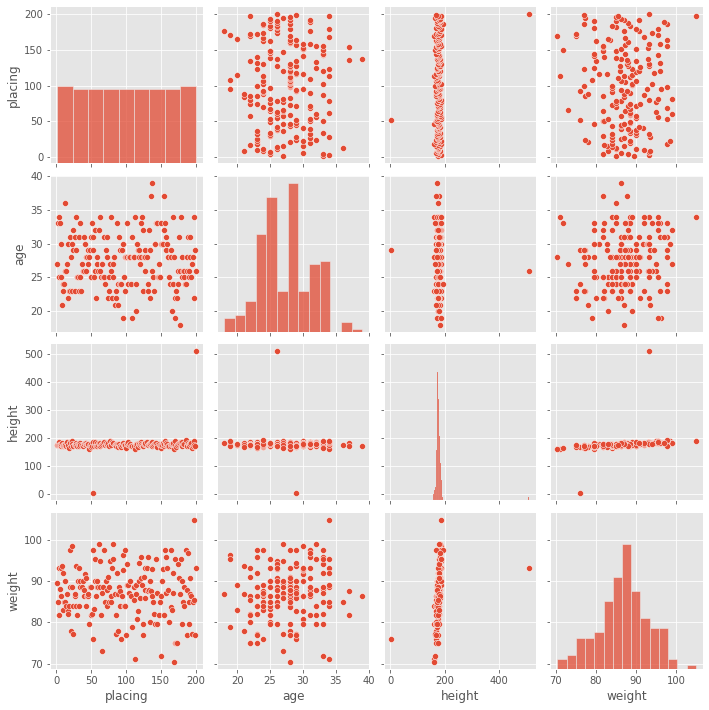

In [132]:
x = df_masc[['placing', 'country', 'age', 'height', 'weight', 'affiliate']]
sns.pairplot(x)

In [133]:
df_masc.query('height < 120 or height > 400')

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,
51,OMAR,MARTINEZ,52,Venezuela,South America,29,not_affiliate,1075.0,25,725,13,312,135.15,2.0,76.00
199,SERGIO,BRICENO,200,United States,North America,26,CrossFit Crash,3139.0,1455,347,671,666,129.71,511.0,93.18


In [136]:
df_masc.iat[51,13] = NaN
df_masc.iat[199,13] = NaN

In [137]:
df_masc.query('height < 120 or height > 400')

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight
index,,,,,,,,,,,,,,,


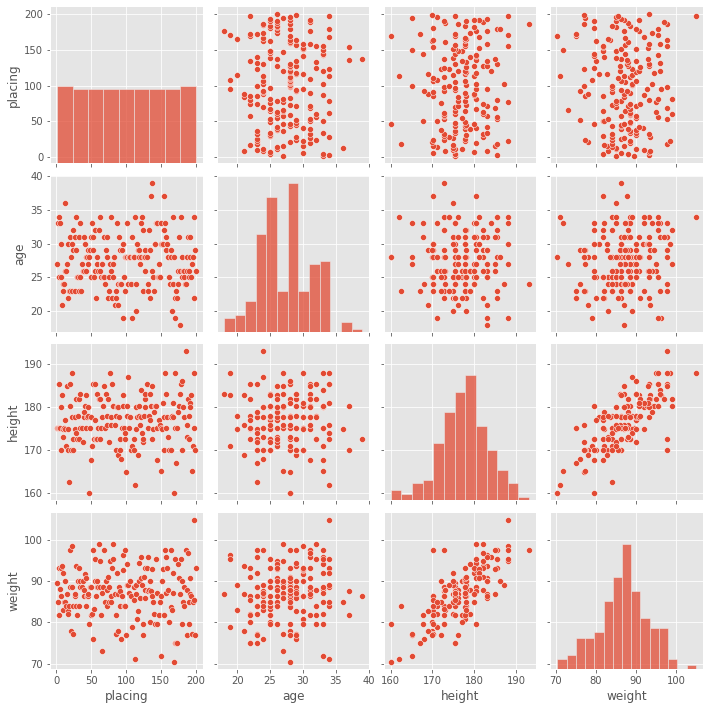

In [138]:
x = df_masc[['placing', 'country', 'age', 'height', 'weight', 'affiliate']]
sns.pairplot(x)